In [17]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
'''
数据说明
SID：唯一标示
SEASON：台风开始的年
NUMBER：一年的第几个台风
SUBBASIN：子盆地当前风暴的位置
NAME：名字
ISO_TIME：观测的系统时间
NATURE：类型
LAT
LON
WMO_WIND：最大持续风速
WMO_PRES：最小中心压力
WMO_AGENCY：负责在当前位置对系统发出警告的WMO机构
TRACK_TYPE：轨道类型(主或支路)
DIST2LAND：从当前位置到着陆的当前距离
LANDFALL：未来3小时至陆地的最小距离
IFLAG：一种标识用于在给定时间填充值的内插类型的标志
STORM_SPEED：风暴的转化速度
STORM_DIR：风暴转化方向

'''

# 显示所有列
pd.set_option('display.max_columns', None)

# 显示所有行
pd.set_option('display.max_rows', None)

# 设置value的显示长度为100，默认为50
pd.set_option('max_colwidth', 100)
file = '../../dataset/ibtracs.WP.list.v04r00.csv'

data = pd.read_csv(file)
data = data[['SID', 'BASIN', 'SUBBASIN', 'ISO_TIME',
             'NATURE', 'LAT', 'LON', 'WMO_WIND', 'WMO_PRES', 'WMO_AGENCY', 'DIST2LAND', 'LANDFALL',
              'USA_AGENCY', 'USA_ATCF_ID', 'USA_LAT', 'USA_LON','STORM_SPEED','STORM_DIR']]
data = data[1:]
data.head()
# print(data.head())



/Users/dongpingping/Library/Python/3.8/lib/python/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (1,2,8,9,14,25,131,132,133,161,162) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,SID,BASIN,SUBBASIN,ISO_TIME,NATURE,LAT,LON,WMO_WIND,WMO_PRES,WMO_AGENCY,DIST2LAND,LANDFALL,USA_AGENCY,USA_ATCF_ID,USA_LAT,USA_LON,STORM_SPEED,STORM_DIR
1,1884177N17124,WP,MM,1884-06-24 16:00:00,NR,16.5000,124.000,,,,165,145,,,,,6,281
2,1884177N17124,WP,MM,1884-06-24 18:00:00,NR,16.5373,123.800,,,,145,111,,,,,6,282
3,1884177N17124,WP,MM,1884-06-24 21:00:00,NR,16.5978,123.500,,,,111,77,,,,,6,283
4,1884177N17124,WP,MM,1884-06-25 00:00:00,NR,16.6706,123.200,,,,77,44,,,,,6,286
5,1884177N17124,WP,MM,1884-06-25 03:00:00,NR,16.7633,122.900,,,,44,33,,,,,6,289


In [18]:
import datetime
# 时间转换
data['ISO_TIME'] =  pd.to_datetime(data['ISO_TIME'])
begin = datetime.datetime(2000,1,1,0,0,0)
# 选择西北太平洋 且2000年之后的数据
print(data.shape)
data = data[(data['BASIN']=='WP') & (data['ISO_TIME']>=begin)]
# 转换后的文件
print(data.shape)
# (38636, 18)

(237199, 18)
(38636, 18)


In [19]:
# one-hot 编码
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
encoder = LabelEncoder()
NATURE_category = encoder.fit_transform(data['NATURE'])
print(NATURE_category)

# 将数字内容oneHot
oneHotEncoder = OneHotEncoder()
result = oneHotEncoder.fit_transform(NATURE_category.reshape(-1,1))

right = result.toarray()
left = data.values
d = np.hstack((left,right))
data = pd.DataFrame(d,columns=[x for x in data.columns] + ['A','B','C','D','E','F'])
# result = pd.concat([data,newD],axis=1,join='')
data.head()

[5 5 5 ... 3 3 3]


,SID,BASIN,SUBBASIN,ISO_TIME,NATURE,LAT,LON,WMO_WIND,WMO_PRES,WMO_AGENCY,DIST2LAND,LANDFALL,USA_AGENCY,USA_ATCF_ID,USA_LAT,USA_LON,STORM_SPEED,STORM_DIR,A,B,C,D,E,F
0,2000125N06136,WP,MM,2000-05-03 18:00:00,TS,6.2,135.7,,,,773,773,jtwc_wp,WP012000,6.20000,135.700,12,344,0,0,0,0,0,1
1,2000125N06136,WP,MM,2000-05-03 21:00:00,TS,6.77253,135.535,,,,840,840,,WP012000,6.77253,135.535,11,345,0,0,0,0,0,1
2,2000125N06136,WP,MM,2000-05-04 00:00:00,TS,7.3,135.4,,,,896,896,jtwc_wp,WP012000,7.30000,135.400,10,348,0,0,0,0,0,1
3,2000125N06136,WP,MM,2000-05-04 03:00:00,TS,7.74498,135.32,,,,935,935,,WP012000,7.74498,135.320,8,353,0,0,0,0,0,1
4,2000125N06136,WP,MM,2000-05-04 06:00:00,TS,8.1,135.3,,,,960,960,jtwc_wp,WP012000,8.10000,135.300,6,2,0,0,0,0,0,1


In [23]:
# 归一化
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import numpy as np
minMaxScaler = MinMaxScaler()
columns = ['LAT','LON','DIST2LAND','LANDFALL','STORM_SPEED','STORM_DIR','A','B','C','D','E','F']
data_str = data[['SID','ISO_TIME']]
data_num = data[columns]
data_num = data_num.replace({' ':0.0})

data_v = data_num.values.astype(np.float)
data_v = minMaxScaler.fit_transform(data_v)
data_v = np.hstack((data_str.values,data_v))

# data_v.shape
data = pd.DataFrame(data_v,columns=['SID','ISO_TIME']+columns)
data.head()
data.to_csv('data_norm.csv',header = True,index=False)

# 监督化: 预测后面一个
```python
from pandas import DataFrame
# shift()函数 预测后一个
df = DataFrame()
df['t'] = [x for x in range(10)]
df['t-1'] = df['t'].shift(2)
print(df)
data['label_lat'] = data['LAT'].shift(16)
data['label_lon'] = data['LON'].shift(16)
data[0:200]
```

# series_to_supervised()函数： 单变量/多变量时间序列
参数：
- data：观测值序列，类型为numpy
- n_in：输入多滞后观测值数量
- n_out：输出的观测值数量
- dropnan：是否删除具有Nan的行，默认True


In [7]:
from pandas import DataFrame
from pandas import concat
# 单个台风监督化
def series_to_supervised(data,n_in,n_out,Label):
    '''
    label : list 标签
    '''
    col_name = data.columns
#     print('col_name:',col_name)
    
    cols,names = list(),list()
    # 输入序列
    for i in range(n_in,0,-1):
        cols.append(data.shift(i))
        names += [(x+'(t-%d)')%i for x in col_name]
       
    # 预测序列 (t,t+1,...,t+n)
    for i in range(0,n_out):
        for j in Label:
            cols.append(data[j].shift(-i))  
            names += ['label_'+j+'_(t+%d)'%i]    
    
    data_super = concat(cols,axis = 1)
    data_super.columns = names
    
    return data_super,cols


def supervised(data):
    '''
    k:总步长
    '''
    start = 0
    data_new = DataFrame()
    count = 0
    while start < len(data) - 2:
        target = start + 1
        # start 定死了，target 往后移
        while data['SID'][start] == data['SID'][target] and target < len(data) - 1:
            target += 1
        count += 1
#         print('start:%d,end:%d'%(start,target))
        # 监督化
        data_local, cols = series_to_supervised(data[start:target],2,2,['LAT','LON']) 
        data_new = data_new.append(data_local,ignore_index=True)
        start = target
    return data_new,count  

data_supervised,count = supervised(data)
print('台风数量：',count)
data_supervised[0:20]
data_supervised.shape
            
    


台风数量： 638


,SID(t-2),ISO_TIME(t-2),LAT(t-2),LON(t-2),DIST2LAND(t-2),LANDFALL(t-2),STORM_SPEED(t-2),STORM_DIR(t-2),A(t-2),B(t-2),C(t-2),D(t-2),E(t-2),F(t-2),SID(t-1),ISO_TIME(t-1),LAT(t-1),LON(t-1),DIST2LAND(t-1),LANDFALL(t-1),STORM_SPEED(t-1),STORM_DIR(t-1),A(t-1),B(t-1),C(t-1),D(t-1),E(t-1),F(t-1),label_LAT_(t+0),label_LON_(t+0),label_LAT_(t+1),label_LON_(t+1)
0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0910569,0.446468,0.100366,0.444404
1,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000125N06136,2000-05-03 18:00:00,0.0910569,0.446468,0.243235,0.243541,0.137931,0.955556,0,0,0,0,0,1,0.100366,0.444404,0.108943,0.442716
2,2000125N06136,2000-05-03 18:00:00,0.0910569,0.446468,0.243235,0.243541,0.137931,0.955556,0,0,0,0,0,1,2000125N06136,2000-05-03 21:00:00,0.100366,0.444404,0.264317,0.26465,0.126437,0.958333,0,0,0,0,0,1,0.108943,0.442716,0.116179,0.441715
3,2000125N06136,2000-05-03 21:00:00,0.100366,0.444404,0.264317,0.26465,0.126437,0.958333,0,0,0,0,0,1,2000125N06136,2000-05-04 00:00:00,0.108943,0.442716,0.281938,0.282294,0.114943,0.966667,0,0,0,0,0,1,0.116179,0.441715,0.121951,0.441465
4,2000125N06136,2000-05-04 00:00:00,0.108943,0.442716,0.281938,0.282294,0.114943,0.966667,0,0,0,0,0,1,2000125N06136,2000-05-04 03:00:00,0.116179,0.441715,0.29421,0.294581,0.091954,0.980556,0,0,0,0,0,1,0.121951,0.441465,0.126382,0.441903
5,2000125N06136,2000-05-04 03:00:00,0.116179,0.441715,0.29421,0.294581,0.091954,0.980556,0,0,0,0,0,1,2000125N06136,2000-05-04 06:00:00,0.121951,0.441465,0.302077,0.302457,0.0689655,0.00555556,0,0,0,0,0,1,0.126382,0.441903,0.130081,0.442716
6,2000125N06136,2000-05-04 06:00:00,0.121951,0.441465,0.302077,0.302457,0.0689655,0.00555556,0,0,0,0,0,1,2000125N06136,2000-05-04 09:00:00,0.126382,0.441903,0.302391,0.302773,0.0574713,0.0305556,0,0,0,0,0,1,0.130081,0.442716,0.134268,0.443716
7,2000125N06136,2000-05-04 09:00:00,0.126382,0.441903,0.302391,0.302773,0.0574713,0.0305556,0,0,0,0,0,1,2000125N06136,2000-05-04 12:00:00,0.130081,0.442716,0.306482,0.306868,0.0574713,0.0444444,0,0,0,0,0,1,0.134268,0.443716,0.137236,0.448969
8,2000125N06136,2000-05-04 12:00:00,0.130081,0.442716,0.306482,0.306868,0.0574713,0.0444444,0,0,0,0,0,1,2000125N06136,2000-05-04 15:00:00,0.134268,0.443716,0.311202,0.311594,0.0804598,0.133333,0,0,0,0,0,1,0.137236,0.448969,0.14175,0.448143
9,2000125N06136,2000-05-04 15:00:00,0.134268,0.443716,0.311202,0.311594,0.0804598,0.133333,0,0,0,0,0,1,2000125N06136,2000-05-04 18:00:00,0.137236,0.448969,0.325362,0.323882,0.0689655,0.102778,0,0,0,0,0,1,0.14175,0.448143,0.146138,0.445217


训练集 epoch:1,loss:0.036864135414361954
测试集 epoch:1,loss is 0.06314797523879895
训练集 epoch:2,loss:0.02301034890115261
测试集 epoch:2,loss is 0.04002675508942317
训练集 epoch:3,loss:0.017638111487030983
测试集 epoch:3,loss is 0.03943348327237699
训练集 epoch:4,loss:0.018511995673179626
测试集 epoch:4,loss is 0.03937548698460752
训练集 epoch:5,loss:0.01811915636062622
测试集 epoch:5,loss is 0.03936901901313966
训练集 epoch:6,loss:0.011233402416110039
测试集 epoch:6,loss is 0.03936845863548418
训练集 epoch:7,loss:0.01412329263985157
测试集 epoch:7,loss is 0.03936845038551837
训练集 epoch:8,loss:0.021094275638461113
测试集 epoch:8,loss is 0.03936845008370087
训练集 epoch:9,loss:0.012354027479887009
测试集 epoch:9,loss is 0.03936845027341473
训练集 epoch:10,loss:0.008376074954867363
测试集 epoch:10,loss is 0.03936845027341473
训练集 epoch:11,loss:0.02338566444814205
测试集 epoch:11,loss is 0.03936845027341473
训练集 epoch:12,loss:0.010454144328832626
测试集 epoch:12,loss is 0.03936845027341473
训练集 epoch:13,loss:0.013177666813135147
测试集 epoch:13,loss is 0.

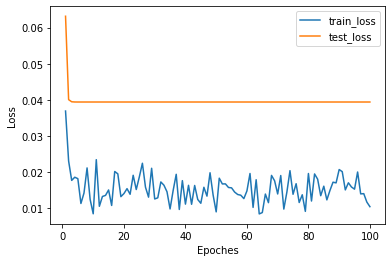

In [151]:
import torch
from torch import nn,optim
from torch.utils.data import DataLoader,Dataset
import os
import matplotlib.pyplot as plt# 数据加载
class DataSet(Dataset):
    '''
    构建数据集
    '''
    def __init__(self,data_pd):
        data_DAE = data_pd[['LAT','LON','DIST2LAND','LANDFALL','STORM_SPEED','STORM_DIR','A','B','C','D','E','F']]
        data_DAE = np.array(data_DAE)
        self.x_data = torch.from_numpy(data_DAE[:,:]).type(torch.float32)
        self.y_data = torch.from_numpy(data_DAE[:,:]).type(torch.float32)
        self.len = data_DAE.shape[0]
    def __getitem__(self,index):
        return self.x_data[index],self.y_data[index]
    def __len__(self):
        '''
        返回数据的数目
        '''
        return self.len
    
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv2d') != -1:
        nn.init.xavier_normal_(m.weight.data)
        nn.init.constant_(m.bias.data, 0.0)
    elif classname.find('Linear') != -1:
        nn.init.xavier_normal_(m.weight)
        nn.init.constant_(m.bias, 0.0)

# 训练模型啦！
class Auto_Encoder(nn.Module):
    def __init__(self):
        super(Auto_Encoder,self).__init__()
        self.encoder = nn.Sequential(nn.Dropout(p=0.5),
                                     nn.Linear(12,64),
                                    nn.ReLU(True),
                                     nn.Dropout(p=0.5),
                                    nn.Linear(64,32),
                                    nn.ReLU(True),
                                     nn.Linear(32,4)
                                     
                                    )
        self.decoder = nn.Sequential( nn.Dropout(p=0.5),
                                     nn.Linear(4,32),
                                    nn.ReLU(True),
                                     nn.Dropout(p=0.5),
                                    nn.Linear(32,64),
                                    nn.ReLU(True),
                                     nn.Linear(64,12),
                                     
#                                      nn.Tanh()
                                    )
    def forward(self,x):
        encoder = self.encoder(x)
        decoder = self.decoder(encoder)
        return encoder,decoder


if __name__ == '__main__':
    # 画图用曲线
    loss_train = []
    loss_test = []
    x_epoch = []
    batch_size = 64
    lr = 1e-2
    weight_decay = 1e-4
    epoches = 100
    model = Auto_Encoder()
    model.apply(weights_init)
    data_all = pd.read_csv('data_norm.csv')
    train_data = DataSet(data_all[0:30000])
    test_data = DataSet(data_pd[30000:])
    train_loader = DataLoader(train_data,batch_size = batch_size,shuffle = True)
    test_loader = DataLoader(test_data,batch_size=batch_size,shuffle = False)
    criterion = nn.MSELoss()
    optimizier = optim.Adam(model.parameters(),lr = lr,weight_decay = weight_decay)
    if torch.cuda.is_available():
        model.cuda
    for epoch in range(epoches):
        train_batch_total = 0
        test_batch_total = 0
        test_loss = 0
        train_loss = 0        
        for param_group in optimizier.param_groups:
            param_group['lr'] *= 0.1
        # 训练
        for batch_idx, data in enumerate(train_loader):
            x,y = data
            hidden_vector,output = model(x)
            loss = criterion(output,y)
            # backward
            optimizier.zero_grad()
            loss.backward()
            optimizier.step()
        print('训练集 epoch:{},loss:{}'.format(epoch+1,loss.item()))
        loss_train.append(loss.item())
        
        # 测试
        model.eval()
        with torch.no_grad():
            for batch_idx,data in enumerate(test_loader):
                x,y = data
                hidden_vector,output = model(x)
                loss = criterion(output,y)
                test_loss += loss.item()
                test_batch_total += 1
            print('测试集 epoch:{},loss is {}'.format((epoch+1),test_loss/test_batch_total))
            loss_test.append(test_loss/test_batch_total)
        # 可视化
    x_epoch = np.arange(1,101)
    plt.figure()
    plt.plot(x_epoch,loss_train,label='train_loss')
    plt.plot(x_epoch,loss_test,label='test_loss')
    plt.xlabel('Epoches')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
        
        
